<a href="https://colab.research.google.com/github/ImAli0/ML_and_DataScience/blob/main/18-Naive-Bayes-and-NLP/Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NLP and Supervised Learning
## Text Data Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from sklearn.pipeline import Pipeline

In [2]:
df = pd.read_csv('/content/airline_tweets.csv')
df.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


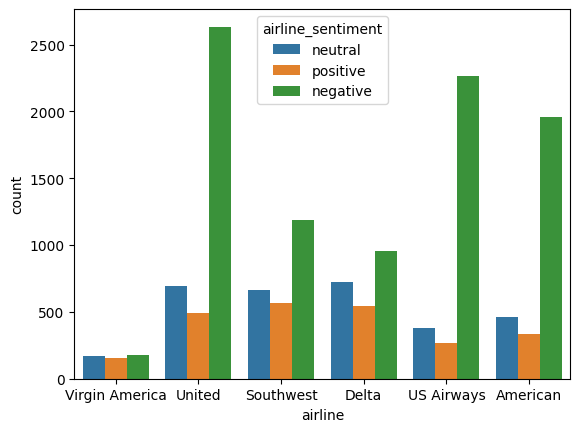

In [3]:
sns.countplot(df, x='airline', hue='airline_sentiment');

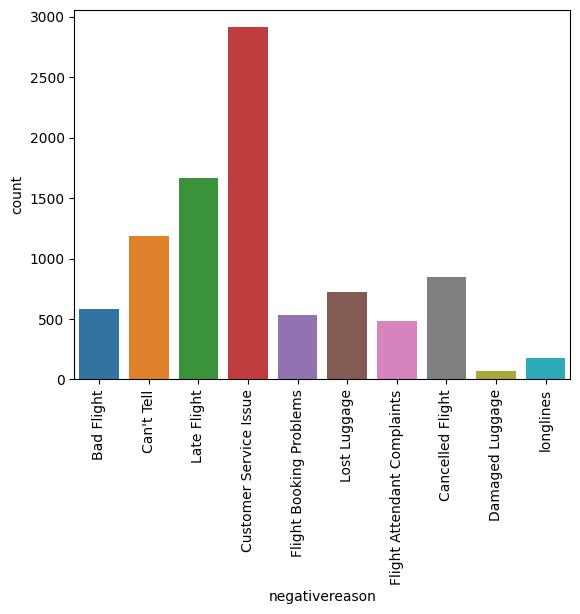

In [4]:
sns.countplot(df, x='negativereason', hue='negativereason', legend=False)
plt.xticks(rotation=90);

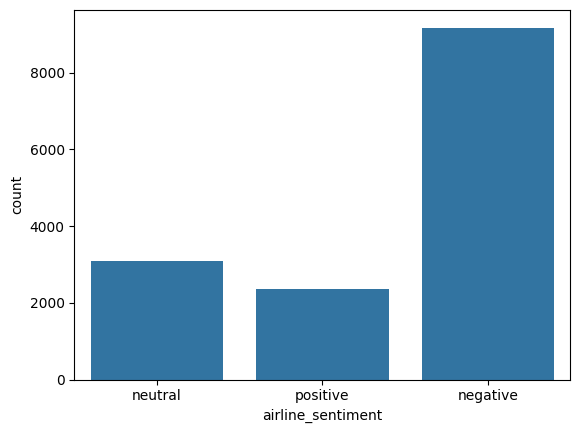

In [5]:
sns.countplot(df, x='airline_sentiment');

In [6]:
df['airline_sentiment'].value_counts()

airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

## Features and Label

In [7]:
data = df[['airline_sentiment', 'text']]
X = data['text']
y = data['airline_sentiment']
data.head()

,airline_sentiment,text
0,neutral,@VirginAmerica What @dhepburn said.
1,positive,@VirginAmerica plus you've added commercials t...
2,neutral,@VirginAmerica I didn't today... Must mean I n...
3,negative,@VirginAmerica it's really aggressive to blast...
4,negative,@VirginAmerica and it's a really big bad thing...


## Vectorization
### Train Test Split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(X_train)
X_train_tfidf = tfidf.transform(X_train)
X_test_tfidf = tfidf.transform(X_test)
X_train_tfidf

<11712x12992 sparse matrix of type '<class 'numpy.float64'>'
	with 106693 stored elements in Compressed Sparse Row format>

# Model Comparisons - Naive Bayes,LogisticRegression, LinearSVC | Performance Evaluation


NB MODEL
              precision    recall  f1-score   support

    negative       0.68      1.00      0.81      1857
     neutral       0.81      0.15      0.25       623
    positive       0.87      0.16      0.27       448

    accuracy                           0.69      2928
   macro avg       0.78      0.44      0.44      2928
weighted avg       0.73      0.69      0.61      2928



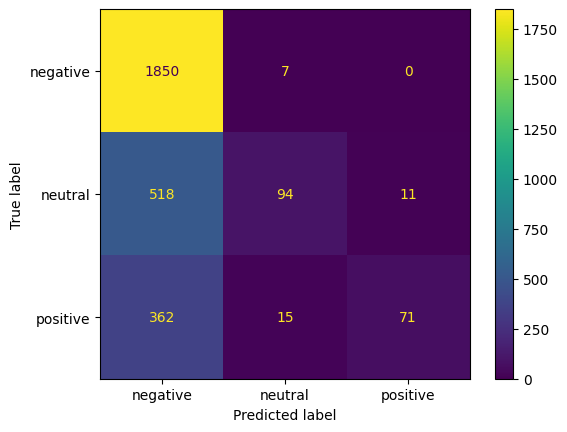

In [9]:
nb = MultinomialNB()
nb.fit(X_train_tfidf, y_train)

log = LogisticRegression(max_iter=1000)
log.fit(X_train_tfidf, y_train)

svc = LinearSVC()
svc.fit(X_train_tfidf, y_train)

# PERFORMANCE EVALUATION
def report(model):
  preds = model.predict(X_test_tfidf)
  print(classification_report(y_test, preds))
  ConfusionMatrixDisplay.from_predictions(y_test, preds)

print('NB MODEL')
report(nb)

Logistic Regression
              precision    recall  f1-score   support

    negative       0.81      0.94      0.87      1857
     neutral       0.68      0.48      0.57       623
    positive       0.79      0.59      0.68       448

    accuracy                           0.79      2928
   macro avg       0.76      0.67      0.70      2928
weighted avg       0.78      0.79      0.77      2928



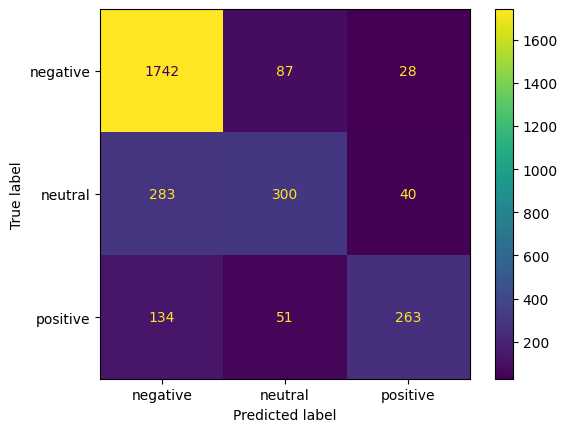

In [10]:
print('Logistic Regression')
report(log)

SVC
              precision    recall  f1-score   support

    negative       0.83      0.90      0.86      1857
     neutral       0.62      0.52      0.57       623
    positive       0.73      0.64      0.68       448

    accuracy                           0.78      2928
   macro avg       0.73      0.69      0.70      2928
weighted avg       0.77      0.78      0.77      2928



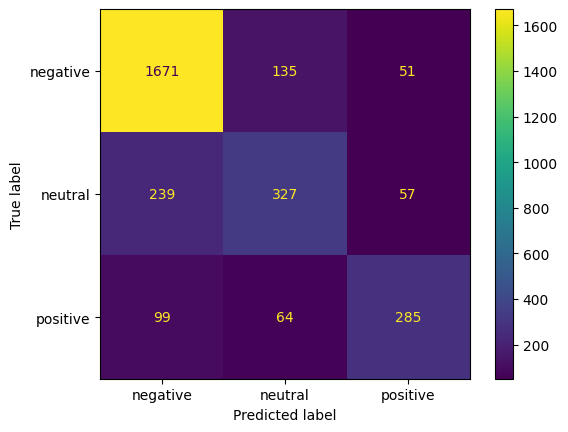

In [11]:
print('SVC')
report(svc)

# Finalizing Pipeline for Deployment on New Tweets

In [13]:
pipe = Pipeline([('tfidf',TfidfVectorizer()), ('log',LogisticRegression(max_iter=1000))])
pipe.fit(df['text'], df['airline_sentiment'])

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('log', LogisticRegression(max_iter=1000))])

In [14]:
new_tweet = ['good flight']
pipe.predict(new_tweet)

array(['positive'], dtype=object)

In [15]:
new_tweet = ['bad flight']
pipe.predict(new_tweet)

array(['negative'], dtype=object)

In [16]:
new_tweet = ['ok flight']
pipe.predict(new_tweet)

array(['neutral'], dtype=object)

In [17]:
tweet = ['flight attendants were good but the flight was not satisfying']
pipe.predict(tweet)

array(['negative'], dtype=object)

In [18]:
tweet = ['despite attendants being nice to us the flight was horrible']
pipe.predict(tweet)

array(['negative'], dtype=object)

In [19]:
tweet = ['honestly I dunno what to say, not really sure']
pipe.predict(tweet)

array(['negative'], dtype=object)